# Teste para Duas Médias - ANOVA (Analysis of Variance)

Análise de variância é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente, com $k$ populaçõess com médias $\mu_i$ desconhecidas.

Os pressupostos básicos da análise de variância são:

- As amostras são aleatórias e independentes
- As populações têm distribuição normal (o teste é paramétrico)
- As variâncias populacionais são iguais

Na prática, esses pressupostos não precisam ser todos rigorosamente satisfeitos. Os resultados são empiricamente verdadeiros sempre que as populações são aproximadamente normais (isso é, não muito assimétricas) e têm variâncias próximas. 

Queremos testar se as $k$ médias são iguais, para isto vamos utilizara tabela **ANOVA - Analysis of Variance**

Variação dos dados:

<br>
$$SQT = \sum_{i=1}^{k}\sum_{j=1}^{n_i} (x_{ij}- \overline x)^2 = 
        \sum_{i=1}^{k}\sum_{j=1}^{n_i} x_{ij}^2 - 
        \frac{1}{n}\Big(\sum_{i=1}^{k}\sum_{j=1}^{n_i} x_{ij}\Big)^2 $$
<br><br>
$$SQE = \sum_{i=1}^{k} n_i(\overline x_{i}- \overline x)^2 =
        \sum_{i=1}^{k} \frac{1}{n_i}\Big (\sum_{j=1}^{n_i} x_{ij}\Big)^2 -
        \frac{1}{n}\Big(\sum_{i=1}^{k}\sum_{j=1}^{n_i} x_{ij}\Big)^2 $$
<br><br>
$$SQR =  \sum_{i=1}^{k}\sum_{j=1}^{n_i} x_{ij}^2 -
         \sum_{i=1}^{k} \frac{1}{n_i}\Big (\sum_{j=1}^{n_i} x_{ij}\Big)^2$$
<br><br>
Verifica-se que:

$$SQT=SQE+SQR$$

onde:

- SQT: Soma dos Quadrados Total
- SQE: Soma dos Quadrados Explicada
- SQR: Soma dos Quadrados dos Resíduos

<br><br>
<img src="img/anova.png" width="450" />
<br><br>

Dentro das premissas de variáveis aleatórias e independentes, o ideal é que cada uma das variáveis de um modelo explique uma determinada parte da variável dependente. Com isso, podemos imaginar como o *fit* desejado, variáveis independentes entre si conforme ilustrado na figura abaixo.


<br><br>
<img src="img/anova_explicada.png" width="350" />
<br><br>

# Exemplo: DataSet de crescimento de dentes com duas terapias diferentes

O DataSet representa o crescimento de dentes em animais submetidos a duas terapias alternativas, onde a resposta é o comprimento dos odontoblastos (células responsáveis pelo crescimento dentário) em 60 porquinhos-da-índia. Cada animal recebeu um dos três níveis de dose de vitamina C (0,5, 1 e 2 mg / dia) por um dos dois métodos de entrega (suco de laranja "OJ" ou ácido ascórbico (uma forma de vitamina C e codificada como "CV").

Uma vantagem importante do ANOVA de duas vias é que ele é mais eficiente em comparação com o one-way. Existem duas fontes de variação designáveis supp e dose em nosso exemplo - e isso ajuda a reduzir a variação de erros, tornando esse design mais eficiente. A ANOVA bidirecional (fatorial) pode ser usada para, por exemplo, comparar as médias das populações que são diferentes de duas maneiras. Também pode ser usado para analisar as respostas médias em um experimento com dois fatores. Ao contrário do One-Way ANOVA, ele nos permite testar o efeito de dois fatores ao mesmo tempo. Pode-se também testar a independência dos fatores, desde que haja mais de uma observação em cada célula. A única restrição é que o número de observações em cada célula deve ser igual (não existe tal restrição no caso de ANOVA unidirecional).

Discutimos modelos lineares mais cedo - e ANOVA é de fato um tipo de modelo linear - a diferença é que ANOVA é onde você tem fatores discretos cujo efeito em um resultado contínuo (variável) você quer entender.

## Importando as bibliotecas

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

## Importando os dados

In [3]:
datafile = "dados/ToothGrowth.csv"
data = pd.read_csv(datafile)

In [4]:
data.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [9]:
data['supp'].value_counts(dropna=False).nlargest()

VC    30
OJ    30
Name: supp, dtype: int64

In [11]:
data['len'].value_counts(dropna=False).head()

26.4    4
14.5    3
16.5    3
9.7     2
27.3    2
Name: len, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
Unnamed: 0    60 non-null int64
len           60 non-null float64
supp          60 non-null object
dose          60 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [6]:
data.describe()

,Unnamed: 0,len,dose
count,60.000000,60.000000,60.000000
mean,30.500000,18.813333,1.166667
std,17.464249,7.649315,0.628872
min,1.000000,4.200000,0.500000
25%,15.750000,13.075000,0.500000
50%,30.500000,19.250000,1.000000
75%,45.250000,25.275000,2.000000
max,60.000000,33.900000,2.000000


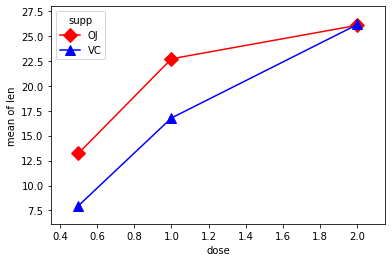

In [7]:
fig = interaction_plot(data.dose, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms=10)

## Calculando a soma dos quadrados

<br>
<img src="img/SS.png">
<br>

## Graus de Liberdade, o que são?
*fonte https://blog.minitab.com/pt/quais-sao-os-graus-de-liberdade-nas-estatisticas*

Imagine que você é uma pessoa que gosta de diversão e adora usar chapéus. Você não dá a menor importância para os graus de liberdade. Você acredita que variedade é o tempero da vida. Infelizmente, você tem restrições. Você tem apenas 7 chapéus. No entanto, você quer usar um chapéu diferente todos os dias da semana.
<br>
<img src="img/chapeus.png">
<br>
No primeiro dia, você pode usar qualquer um dos 7 chapéus. No segundo dia, você pode escolher entre os 6 chapéus restantes, no 3º dia você pode escolher entre 5 chapéus e assim por diante.

Quando o sexto dia chega, você ainda pode escolher entre dois chapéus que ainda não usou naquela semana. Mas depois de escolher o seu chapéu para o 6º dia, você não tem escolha para o chapéu que você usa no 7º dia. Você deverá usar o único chapéu restante. Você tinha 7-1 = 6 dias de liberdade de “chapéu” — em que o chapéu que você usava poderia variar!

Esse é o tipo de ideia que há por trás dos graus de liberdade na estatística. Em geral, os graus de liberdade são definidos como o número de "observações" (pontos de dados individuais) nos dados que são livres para variar quando é feita a estimativa dos parâmetros estatísticos.
Graus de liberdade: Teste t para 1 amostra
Agora imagine que você não gosta de chapéus. Você gosta de análise de dados.

Você tem um conjunto de dados com 10 valores. Se você não está estimando nada, cada valor pode receber qualquer número, certo? Cada valor é totalmente livre para variar.

Mas suponha que você queira testar a média populacional com uma amostra de 10 valores, e que utilize um teste t para 1 amostra. Agora você tem uma restrição — a estimativa da média. O que é essa restrição, exatamente? Para a definição de média, a seguinte relação deve ser mantida: A soma de todos os valores nos dados deve ser igual a n x a média, em que n é o número de valores no conjunto de dados.

Portanto, se um conjunto de dados tiver 10 valores, a soma dos 10 valores deverá ser igual à média x 10. Se a média dos 10 valores for 3.5 (você pode escolher qualquer número), essa restrição exige que a soma dos 10 valores seja igual a 10 x 3.5 = 35.

Com essa restrição, o primeiro valor no conjunto de dados é livre para variar. Seja qual for o valor, ainda é possível que a soma de todos os 10 números tenha o valor de 35. O segundo valor também é livre para variar, porque não importa o valor escolhido, ele ainda possibilita que a soma de todos os valores seja 35.

De fato, os primeiros 9 valores podem ser qualquer coisa, incluindo estes dois exemplos:

34, -8,3, -37, -92, -1, 0, 1, -22, 99
0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9

Mas para que todos os 10 valores sejam somados a 35 e tenham uma média de 3.5, o 10º valor não pode variar. Ele deve ser um número específico:

34, -8,3, -37, -92, -1, 0, 1, -22, 99  -----> o 10o valor deve ser 61.3
0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ----> o 10o valor deve ser 30.5

Portanto, você tem 10 - 1 = 9 graus de liberdade. Não importa qual tamanho amostral você usa, ou que valor da media você usa — o último valor da amostra não está livre para variar. Você termina com n - 1 graus de liberdade, em que n é o tamanho amostral.

Outra maneira de dizer isso é que o número de graus de liberdade é igual ao número de “observações” menos o número de relacionamentos necessários entre as observações (por exemplo, o número de estimativas de parâmetros). Para um teste t para 1 amostra, um grau de liberdade é utilizado na estimativa da média, e os restantes n - 1 graus de liberdade estimam a variabilidade.

Então, os graus para liberdade definem a distribuição t específica que é usada para calcular os valores-p e os valores-t para o teste t.


In [14]:
# Graus de liberdade

N = len(data.len)
df_a = len(data.supp.unique()) - 1
df_b = len(data.dose.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(data.supp.unique())*len(data.dose.unique()))

In [32]:
print("N = ", N)
print("df_a = ",df_a)
print("df_b = ", df_b)
print("df_axb = ", df_axb)
print("df_w = ", df_w)

N =  60
df_a =  1
df_b =  2
df_axb =  2
df_w =  54


In [27]:
grand_mean = data['len'].mean()

In [33]:
print("grand_mean = ", grand_mean)

grand_mean =  18.813333333333336


In [34]:
# SS para o fator A
ssq_a = sum([(data[data.supp ==l].len.mean()-grand_mean)**2 for l in data.supp])

# SS para o fator B
ssq_b = sum([(data[data.dose ==l].len.mean()-grand_mean)**2 for l in data.dose])

# SS total
ssq_t = sum((data.len - grand_mean)**2)

## SS do resíduo
vc = data[data.supp == 'VC']
oj = data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose == d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose == d].len.mean() for d in oj.dose]
ssq_w = sum((oj.len - oj_dose_means)**2) +sum((vc.len - vc_dose_means)**2)

# SS de AxB (iterativa)
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w

## Média dos Quadrados

In [35]:
# MQ da A
ms_a = ssq_a/df_a

# MQ de B
ms_b = ssq_b/df_b

# MQ de AxB
ms_axb = ssq_axb/df_axb

# MQ do resíduo
ms_w = ssq_w/df_w

## F-Score

In [36]:
# F-Score de A
f_a = ms_a/ms_w

# F-Score de B
f_b = ms_b/ms_w

# F-Score de C
f_axb = ms_axb/ms_w

## p-Value

In [37]:
# p-Value de A
p_a = stats.f.sf(f_a, df_a, df_w)

# p-Value de B
p_b = stats.f.sf(f_b, df_b, df_w)

# p-Value de C
p_axb = stats.f.sf(f_axb, df_axb, df_w)

## Resultados

In [38]:
# Colocando os resultados em um DataFrame

results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
 
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['supp', 'dose', 
                          'supp:dose', 'Residual'])

In [39]:
# Calculando Eta-Squared e Omega-Squared, e imprimindo a tabela

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov
 
 
eta_squared(aov_table1)
omega_squared(aov_table1)
print(aov_table1)

                sum_sq  df        F       PR(>F)    eta_sq  omega_sq
supp        205.350000   1   15.572  0.000231183  0.059484  0.055452
dose       2426.434333   2       92  4.04629e-18  0.702864  0.692579
supp:dose   108.319000   2  4.10699    0.0218603  0.031377  0.023647
Residual    712.106000  54      NaN          NaN       NaN       NaN


### Comentários

Os resultados da variável dose tem a maior distância do valor médio (sum_sq) e portanto a maior variância relativa (F-Score). Isto pode ser comprovado pelo Eta-Squared e Omega-Squared (definição abaixo).

### Mais sobre Eta-Squared e Omega-Squared

Outro conjunto de medidas de tamanho de efeito para variáveis independentes categóricas tem uma interpretação mais intuitiva e é mais fácil de avaliar. Eles incluem o Eta Squared, o Parcial Eta Squared e o Omega Squared. Como a estatística R Squared, todos eles têm a interpretação intuitiva da proporção da variância contabilizada.

Eta Squared é calculado da mesma forma que R Squared, e tem a interpretação mais equivalente: da variação total em Y, a proporção que pode ser atribuída a um X específico.

O Eta Squared, no entanto, é usado especificamente em modelos ANOVA. Cada efeito categórico no modelo tem seu próprio Eta Squared, de modo que você obtenha uma medida específica e intuitiva do efeito dessa variável.

A desvantagem do Eta Squared é que é uma medida tendenciosa da variância da população explicada (embora seja exata para a amostra), sempre superestima.

Esse viés fica muito pequeno à medida que o tamanho da amostra aumenta, mas para amostras pequenas, uma medida de tamanho de efeito imparcial é Omega Squared. Omega Squared tem a mesma interpretação básica, mas usa medidas imparciais dos componentes de variância. Por ser uma estimativa imparcial das variâncias populacionais, o Omega Squared é sempre menor que o Eta Squared (ES).

Não há padrões acordados sobre como interpretar um ES. A interpretação é basicamente subjetiva. Melhor abordagem é comparar com outros estudos.

Cohen (1977):
- 0.2 = pequeno
- 0.5 = moderado
- 0.8 = grande

## ANOVA com Statsmodels

In [40]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)

eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                      sum_sq    df          F        PR(>F)    eta_sq  \
C(supp)           205.350000   1.0  15.571979  2.311828e-04  0.059484   
C(dose)          2426.434333   2.0  91.999965  4.046291e-18  0.702864   
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02  0.031377   
Residual          712.106000  54.0        NaN           NaN       NaN   

                 omega_sq  
C(supp)          0.055452  
C(dose)          0.692579  
C(supp):C(dose)  0.023647  
Residual              NaN  


## Quantile-Quantile (QQplot)

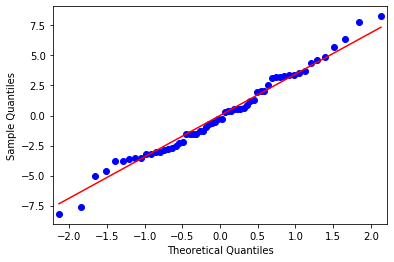

In [41]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()